In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# covax = pd.read_csv("Datasets\covax.csv")
# excess_mortality_economist = pd.read_csv("Datasets\excess_mortality_economist.csv")
# excess_mortality = pd.read_csv("Datasets\excess_mortality.csv")
# hospital = pd.read_csv("Datasets\hospital.csv")
# tracking_r = pd.read_csv("Datasets\\tracking_r.csv")
# vaccinations_age = pd.read_csv("Datasets\\vaccinations_age.csv")
# vaccinations_manufacturer = pd.read_csv("Datasets\\vaccinations_manufacturer.csv")
# vaccinations_us = pd.read_csv("Datasets\\vaccinations_us.csv")
# yougov_composite = pd.read_csv("Datasets\yougov_composite.csv")

countries.csv

In [2]:
countries = pd.read_csv("Datasets\countries.csv")

In [5]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    250 non-null    object 
 1   isocode    250 non-null    object 
 2   latitude   250 non-null    float64
 3   longitude  250 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.9+ KB


In [4]:
# country - To merge datasets
# isocode - Standard country identifier
# latitude, longitude - Useful for mapping mobility trends geographically

# countries has some missing values in isocode, fill them with 0
countries['isocode'] = countries['isocode'].fillna(0)


google_mobility.csv

In [16]:
google_mobility = pd.read_csv("Datasets\google_mobility.csv")

In [22]:
google_mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784944 entries, 0 to 784943
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   country  784944 non-null  object        
 1   date     784944 non-null  datetime64[ns]
 2   trend    784944 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 18.0+ MB


In [ ]:
# country - To merge with other datasets
# date - To analyze trends over time
# trend - % change in mobility (main focus)
google_mobility = google_mobility.drop(columns=['place'])

In [ ]:
google_mobility["date"] = pd.to_datetime(google_mobility["date"])


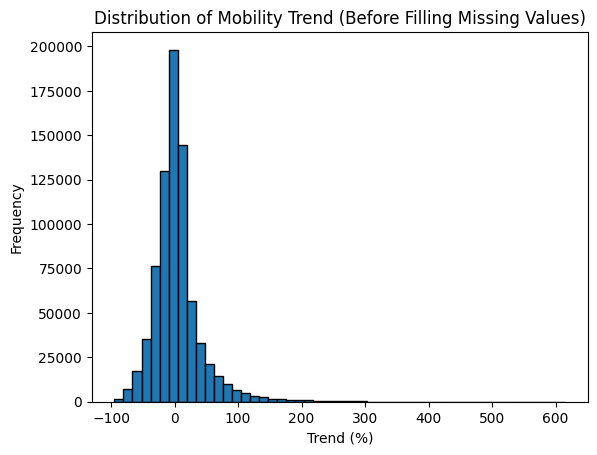

In [19]:
plt.hist(google_mobility['trend'].dropna(), bins=50, edgecolor='black')
plt.title("Distribution of Mobility Trend (Before Filling Missing Values)")
plt.xlabel("Trend (%)")
plt.ylabel("Frequency")
plt.show()

In [20]:
# FRom this histogram we can see that it is right skewed (long tail on right).
# Also most values are centered arond zero, the extreme values (outliers) are on right.
from scipy.stats import skew, kurtosis

skewness = skew(google_mobility['trend'].dropna())
kurt = kurtosis(google_mobility['trend'].dropna())

print("Skewness:", skewness)
print("Kurtosis:", kurt)

# skewness is > 1 means highly skewed
# kurtosis is > 3 means high peak & heavy tails are present (outliers)

Skewness: 2.4663868255207926
Kurtosis: 13.928719414682966


In [21]:
# since data is highly skewed using mean is not good idea
# So we will use median bcoz it is robust to outliers
google_mobility['trend'] = google_mobility['trend'].fillna(google_mobility['trend'].median())

oxcgrt_policy.csv

In [28]:
oxcgrt_policy = pd.read_csv("Datasets\oxcgrt_policy.csv")

In [31]:
oxcgrt_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   country                                202760 non-null  object        
 1   date                                   202760 non-null  datetime64[ns]
 2   c1m_school_closing                     202760 non-null  int64         
 3   c2m_workplace_closing                  202760 non-null  int64         
 4   c3m_cancel_public_events               202760 non-null  int64         
 5   c4m_restrictions_on_gatherings         202760 non-null  int64         
 6   c5m_close_public_transport             202760 non-null  int64         
 7   c6m_stay_at_home_requirements          202760 non-null  int64         
 8   c7m_restrictions_on_internal_movement  202760 non-null  int64         
 9   c8ev_international_travel_controls     202760 no

In [ ]:
# country = To merge datasets.
# date = To track lockdown policy changes.
# c1m_school_closing = School closure impact on mobility.
# c2m_workplace_closing = Work-from-home effect on mobility.
# c3m_cancel_public_events = Public event cancellations.
# c4m_restrictions_on_gatherings = Gathering restrictions.
# c5m_close_public_transport = Public transport restrictions.
# c6m_stay_at_home_requirements = Strictness of stay-at-home policies.
# c7m_restrictions_on_internal_movement = Internal travel restrictions.
# c8ev_international_travel_controls	Global travel restrictions.
# stringency_index = Measures lockdown strictness (important for correlation).
# containment_health_index = Measures containment measures (important for correlation).
# stringency_index_nonvax = Measures lockdown strictness (important for correlation).
# stringency_index_vax = Measures lockdown strictness (important for correlation).
# stringency_index_weighted_average = Measures lockdown strictness (important for correlation).
oxcgrt_policy = oxcgrt_policy.drop(columns=[
    'e1_income_support', 'e2_debt_contract_relief', 'e3_fiscal_measures', 'e4_international_support',
    'h1_public_information_campaigns', 'h2_testing_policy', 'h3_contact_tracing', 'h4_emergency_investment_in_healthcare',
    'h5_investment_in_vaccines', 'h6m_facial_coverings', 'h7_vaccination_policy',
    'v2a_vaccine_availability__summary', 'v2b_vaccine_age_eligibility_availability_age_floor__general_population_summary',
    'v2c_vaccine_age_eligibility_availability_age_floor__at_risk_summary', 'v2_vaccine_availability__summary', 'v2_pregnant_people',
])

In [ ]:
oxcgrt_policy["date"] = pd.to_datetime(oxcgrt_policy["date"])
# Use this only if the filled value doesn't distort analysis. Always explain this choice in your report.
oxcgrt_policy["stringency_index_weighted_average"] = oxcgrt_policy["stringency_index_weighted_average"].ffill()


C:\Users\Rovish\AppData\Local\Temp\ipykernel_10328\1344722391.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oxcgrt_policy["stringency_index_weighted_average"] = oxcgrt_policy["stringency_index_weighted_average"].fillna(method="ffill")


spread.csv

In [32]:
spread = pd.read_csv("Datasets\spread.csv")

In [35]:
spread.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364500 entries, 0 to 364748
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   country                   364500 non-null  object        
 1   date                      364500 non-null  datetime64[ns]
 2   new_cases                 364500 non-null  float64       
 3   new_deaths                364500 non-null  float64       
 4   new_cases_per_million     364500 non-null  float64       
 5   total_cases_per_million   364500 non-null  float64       
 6   new_deaths_per_million    364500 non-null  float64       
 7   total_deaths_per_million  364500 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 25.0+ MB


In [ ]:
# country = To merge with mobility data.
# date = To track cases over time.
# new_cases = To analyze correlation between cases & mobility.
# new_deaths = To check if deaths affected movement.
# new_cases_per_million = Useful for country-wise comparison.
# total_cases_per_million = to compare broader impact.
# new_deaths_per_million = To compare severity across countries.
# total_deaths_per_million = to compare broader impact.
spread = spread.drop(columns=['total_cases', 'total_deaths', 'latititude', 'longitude', 'isocode'])

In [ ]:
spread["date"] = pd.to_datetime(spread["date"])
spread = spread[(spread['date'].dt.year < 2024)]

testing.csv

In [36]:
testing = pd.read_csv("Datasets\\testing.csv")

In [42]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95919 entries, 146 to 106787
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   country                 95919 non-null  object        
 1   date                    95919 non-null  datetime64[ns]
 2   total_tests             95919 non-null  float64       
 3   new_tests               95919 non-null  float64       
 4   new_tests_per_thousand  95919 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 4.4+ MB


In [ ]:
# country = To merge datasets.
# date = To track testing over time.
# total_tests = Higher testing might lead to increased mobility.
# new_tests = Check if mobility increased as more tests were conducted.
# new_tests_per_thousand = Country-wise comparison.
testing = testing.drop(columns=['total_tests_per_thousand', 'new_tests_7day_smoothed', 'new_tests_per_thousand_7day_smoothed'])

In [ ]:
testing["date"] = pd.to_datetime(testing["date"])

In [40]:
missing_percentage = testing.isnull().sum() / len(testing) * 100
print(missing_percentage.sort_values(ascending=False))

new_tests_per_thousand    29.390006
new_tests                 29.390006
total_tests               25.659250
country                    0.000000
date                       0.000000
dtype: float64


In [41]:
# Fill 'new_tests' using 7-day moving average (best for fluctuating daily data)
# testing['new_tests'] = testing.groupby('country')['new_tests'].transform(lambda x: x.fillna(x.rolling(7, min_periods=1).mean()))
testing['new_tests'] = testing.groupby('country')['new_tests'].transform(lambda x: x.fillna(x.median()))

# Fill 'new_tests_per_thousand' using per-country median (robust to outliers)
testing['new_tests_per_thousand'] = testing.groupby('country')['new_tests_per_thousand'].transform(lambda x: x.fillna(x.median()))

# Fill 'total_tests' using forward-fill (best for cumulative values)
testing['total_tests'] = testing.groupby('country')['total_tests'].ffill()

# Drop countries with more than 50% missing values (final cleanup)
testing = testing.dropna(subset=['new_tests', 'new_tests_per_thousand', 'total_tests'])


d:\MTech Courses\Sem 2\CS661\Project\.venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\MTech Courses\Sem 2\CS661\Project\.venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\MTech Courses\Sem 2\CS661\Project\.venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\MTech Courses\Sem 2\CS661\Project\.venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\MTech Courses\Sem 2\CS661\Project\.venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\MTech Courses\Sem 2\CS661\Project\.ve

vaccinations_global.csv

In [52]:
vaccinations_global = pd.read_csv("Datasets\\vaccinations_global.csv")

In [67]:
vaccinations_global.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197566 entries, 0 to 203056
Data columns (total 8 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   country                                       197566 non-null  object        
 1   date                                          197566 non-null  datetime64[ns]
 2   people_vaccinated_per_hundred                 197566 non-null  float64       
 3   people_fully_vaccinated_per_hundred           197566 non-null  float64       
 4   total_boosters_per_hundred                    197566 non-null  float64       
 5   daily_people_vaccinated_smoothed_per_hundred  197565 non-null  float64       
 6   rolling_vaccinations_6m_per_hundred           197565 non-null  float64       
 7   rolling_vaccinations_12m_per_hundred          197565 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 13

In [54]:
# country = To merge datasets.
# date = To track vaccinations over time.
# people_vaccinated_per_hundred = To see if vaccination increased mobility.
# people_fully_vaccinated_per_hundred = Compare mobility before/after full vaccination.
# total_boosters_per_hundred = Booster doses effect on mobility.
# daily_people_vaccinated_smoothed_per_hundred = Smoothed data for better analysis.
# rolling_vaccinations_6m_per_hundred = To check if vaccinations affected mobility.
# rolling_vaccinations_12m_per_hundred = To check if vaccinations affected mobility.
vaccinations_global = vaccinations_global.drop(columns=[
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'daily_vaccinations', 'daily_vaccinations_smoothed',
    'daily_people_vaccinated_smoothed', 'total_vaccinations_per_hundred', 'daily_vaccinations_smoothed_per_million', 'people_unvaccinated',
    'share_of_boosters', 'total_vaccinations_interpolated', 'people_vaccinated_interpolated', 'people_fully_vaccinated_interpolated',
    'total_boosters_interpolated', 'total_vaccinations_no_boosters_interpolated', 'total_vaccinations_no_boosters_per_hundred_interpolated',
    'rolling_vaccinations_6m', 'rolling_vaccinations_9m', 'rolling_vaccinations_9m_per_hundred', 'rolling_vaccinations_12m'
])

In [66]:
vaccinations_global["date"] = pd.to_datetime(vaccinations_global["date"])
vaccinations_global = vaccinations_global[(vaccinations_global['date'].dt.year < 2024)]

vaccinations_global["daily_people_vaccinated_smoothed_per_hundred"] = vaccinations_global["daily_people_vaccinated_smoothed_per_hundred"].ffill()
vaccinations_global["rolling_vaccinations_6m_per_hundred"] = vaccinations_global["rolling_vaccinations_6m_per_hundred"].ffill()
vaccinations_global["rolling_vaccinations_12m_per_hundred"] = vaccinations_global["rolling_vaccinations_12m_per_hundred"].ffill()

vaccinations_global["total_boosters_per_hundred"] = vaccinations_global["total_boosters_per_hundred"].fillna(0)
vaccinations_global["people_vaccinated_per_hundred"] = vaccinations_global["people_vaccinated_per_hundred"].fillna(0)
vaccinations_global["people_fully_vaccinated_per_hundred"] = vaccinations_global["people_fully_vaccinated_per_hundred"].fillna(0)

I'll use outer join to merge the datasets because sone datasets might not have date column with appropriate values.
Outer merge keeps all the values and fill smissing values with NaN.

In [68]:
# Ensuring mobility trends align with case/death counts.
merged_df = google_mobility.merge(spread, on=['country', 'date'], how='outer')

# Adding testing trends, ensuring proper alignment.
merged_df = merged_df.merge(testing, on=['country', 'date'], how='outer')

# Adding vaccination progress over time.
merged_df = merged_df.merge(vaccinations_global, on=['country', 'date'], how='outer')

# Ensuring we capture policy impact on mobility.
merged_df = merged_df.merge(oxcgrt_policy, on=['country', 'date'], how='outer')

# Adding geolocation data, useful for mapping visualizations.
merged_df = merged_df.merge(countries, on='country', how='left')


In [76]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014438 entries, 0 to 1023188
Data columns (total 35 columns):
 #   Column                                        Non-Null Count    Dtype         
---  ------                                        --------------    -----         
 0   country                                       1014438 non-null  object        
 1   date                                          1014438 non-null  datetime64[ns]
 2   trend                                         1014438 non-null  float64       
 3   new_cases                                     1014438 non-null  float64       
 4   new_deaths                                    1014438 non-null  float64       
 5   new_cases_per_million                         1014438 non-null  float64       
 6   total_cases_per_million                       1014438 non-null  float64       
 7   new_deaths_per_million                        1014438 non-null  float64       
 8   total_deaths_per_million                      1

In [70]:
# Fill missing trend (mobility) data with 0 (assuming no mobility change if missing)
# merged_df['trend'].ffill(inplace=True)  # Fill using previous values

# Fill missing numerical values with forward-fill (ffill) and backward-fill (bfill)
merged_df.fillna(method='ffill', inplace=True)  # Fill using previous values
merged_df.fillna(method='bfill', inplace=True)  # Fill using next values

# If some values are still missing, fill with 0 (final fallback)
merged_df.fillna(0, inplace=True)

C:\Users\Rovish\AppData\Local\Temp\ipykernel_10328\2722038149.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)  # Fill using previous values
C:\Users\Rovish\AppData\Local\Temp\ipykernel_10328\2722038149.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='bfill', inplace=True)  # Fill using next values


In [72]:
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_mapping = {
            "NA": "North America",
            "SA": "South America",
            "EU": "Europe",
            "AF": "Africa",
            "AS": "Asia",
            "OC": "Oceania"
        }
        return continent_mapping.get(continent_code, "Unknown")
    except:
        return "Unknown"

merged_df["continent"] = merged_df["country"].apply(country_to_continent)

In [74]:
print(merged_df[["country", "continent"]][merged_df["continent"] == "Unknown"])
new = merged_df[["country", "continent"]][merged_df["continent"] == "Unknown"].groupby("country")
print(new.groups.keys())

                                   country continent
6106                                Africa   Unknown
6107                                Africa   Unknown
6108                                Africa   Unknown
6109                                Africa   Unknown
6110                                Africa   Unknown
...                                    ...       ...
1004191  World excl. China and South Korea   Unknown
1004192  World excl. China and South Korea   Unknown
1004193  World excl. China and South Korea   Unknown
1004194  World excl. China and South Korea   Unknown
1004195  World excl. China and South Korea   Unknown

[51114 rows x 2 columns]
dict_keys(['Africa', 'Asia', 'Asia excl. China', 'Bonaire Sint Eustatius and Saba', "Cote d'Ivoire", 'Curacao', 'Democratic Republic of Congo', 'East Timor', 'Europe', 'European Union (27)', 'High-income countries', 'Kosovo', 'Low-income countries', 'Lower-middle-income countries', 'Micronesia (country)', 'North America', 'Oceania', 'Pi

In [75]:
region_mapping = {
    "Africa": "Africa",
    "Europe": "Europe",
    "Asia": "Asia",
    "South America": "South America",
    "North America": "North America",
    "Oceania": "Oceania",
    # Special Cases
    "Cote d'Ivoire": "Africa",
    "Democratic Republic of Congo": "Africa",
    "Micronesia (country)": "Oceania",
    "Sint Maarten (Dutch part)": "North America",
    "Bonaire Sint Eustatius and Saba": "North America",
    "Curacao": "North America",
    "Reunion": "Africa",
    "Saint Barthelemy": "North America",
    "Saint Helena": "Africa",
    "Pitcairn": "Oceania",
    "Vatican": "Europe",
    "East Timor": "Asia",
}
merged_df.loc[merged_df["country"].isin(region_mapping.keys()), "continent"] = merged_df["country"].map(region_mapping)
merged_df.loc[merged_df["country"].str.contains("World", case=False, na=False), "continent"] = "Global"
merged_df.loc[merged_df["country"].str.contains("Asia", case=False, na=False), "continent"] = "Asia"

non_countries = [
    "European Union (27)", "High-income countries", "Low-income countries",
    "Lower-middle-income countries", "Upper-middle-income countries", "Kosovo"
]

merged_df = merged_df[~merged_df["country"].isin(non_countries)]

In [77]:
merged_df.to_csv("final_data.csv", index=False)